In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
import datetime
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
test = tf.keras.utils.image_dataset_from_directory(
    '../Dataset/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(224,224),
    #batch_size=1,
    shuffle=False
)

Found 2500 files belonging to 25 classes.


In [3]:
def run(id):    
    json = ''
    with open(f'models/{id}.json', 'r') as json_file:
        json = json_file.read()
    
    model = tf.keras.models.model_from_json(json)
    model.load_weights(f'checkpoints/{id}')
    model.summary()
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    model.evaluate(test)
        
    plt.figure(figsize=(15, 20))
    for i in range(len(test.class_names)):
        for images, label in test.filter(lambda x, l: tf.math.equal(tf.math.argmax(l[0]), i)).take(1):
            prediction = model.predict(images)
            sorted_prediction = np.argsort(np.max(prediction, axis=0))
            
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[0, ...].numpy().astype("uint8"))
            plt.title(f"""
GT: {test.class_names[np.argmax(label[0].numpy())]}
1st: {test.class_names[sorted_prediction[-1]]} {round(prediction[0, sorted_prediction[-1]] * 100)}%
2nd: {test.class_names[sorted_prediction[-2]]} {round(prediction[0, sorted_prediction[-2]] * 100)}%
""")
            plt.axis('off')
    
    correct_predictions = dict.fromkeys(test.class_names, 0)
    for images, labels in test:
        predictions = model.predict(images)
        for i in range(len(predictions)):
            label_class = np.argmax(labels[i])
            prediction_class = np.argmax(predictions[i])
    
            if label_class == prediction_class:
                correct_predictions[test.class_names[label_class]] += 1
        
    for k in correct_predictions:
        print(f'{k};{correct_predictions[k] / 100}')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 3)  12         ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 16  448         ['batch_normalization[0][0]']    
                                )                                                             

 add_2 (Add)                    (None, 56, 56, 64)   0           ['batch_normalization_9[0][0]',  
                                                                  'batch_normalization_11[0][0]'] 
                                                                                                  
 activation_2 (Activation)      (None, 56, 56, 64)   0           ['add_2[0][0]']                  
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 28, 28, 64)  0           ['activation_2[0][0]']           
                                                                                                  
 batch_normalization_12 (BatchN  (None, 28, 28, 64)  256         ['max_pooling2d_2[0][0]']        
 ormalization)                                                                                    
                                                                                                  
 flatten (

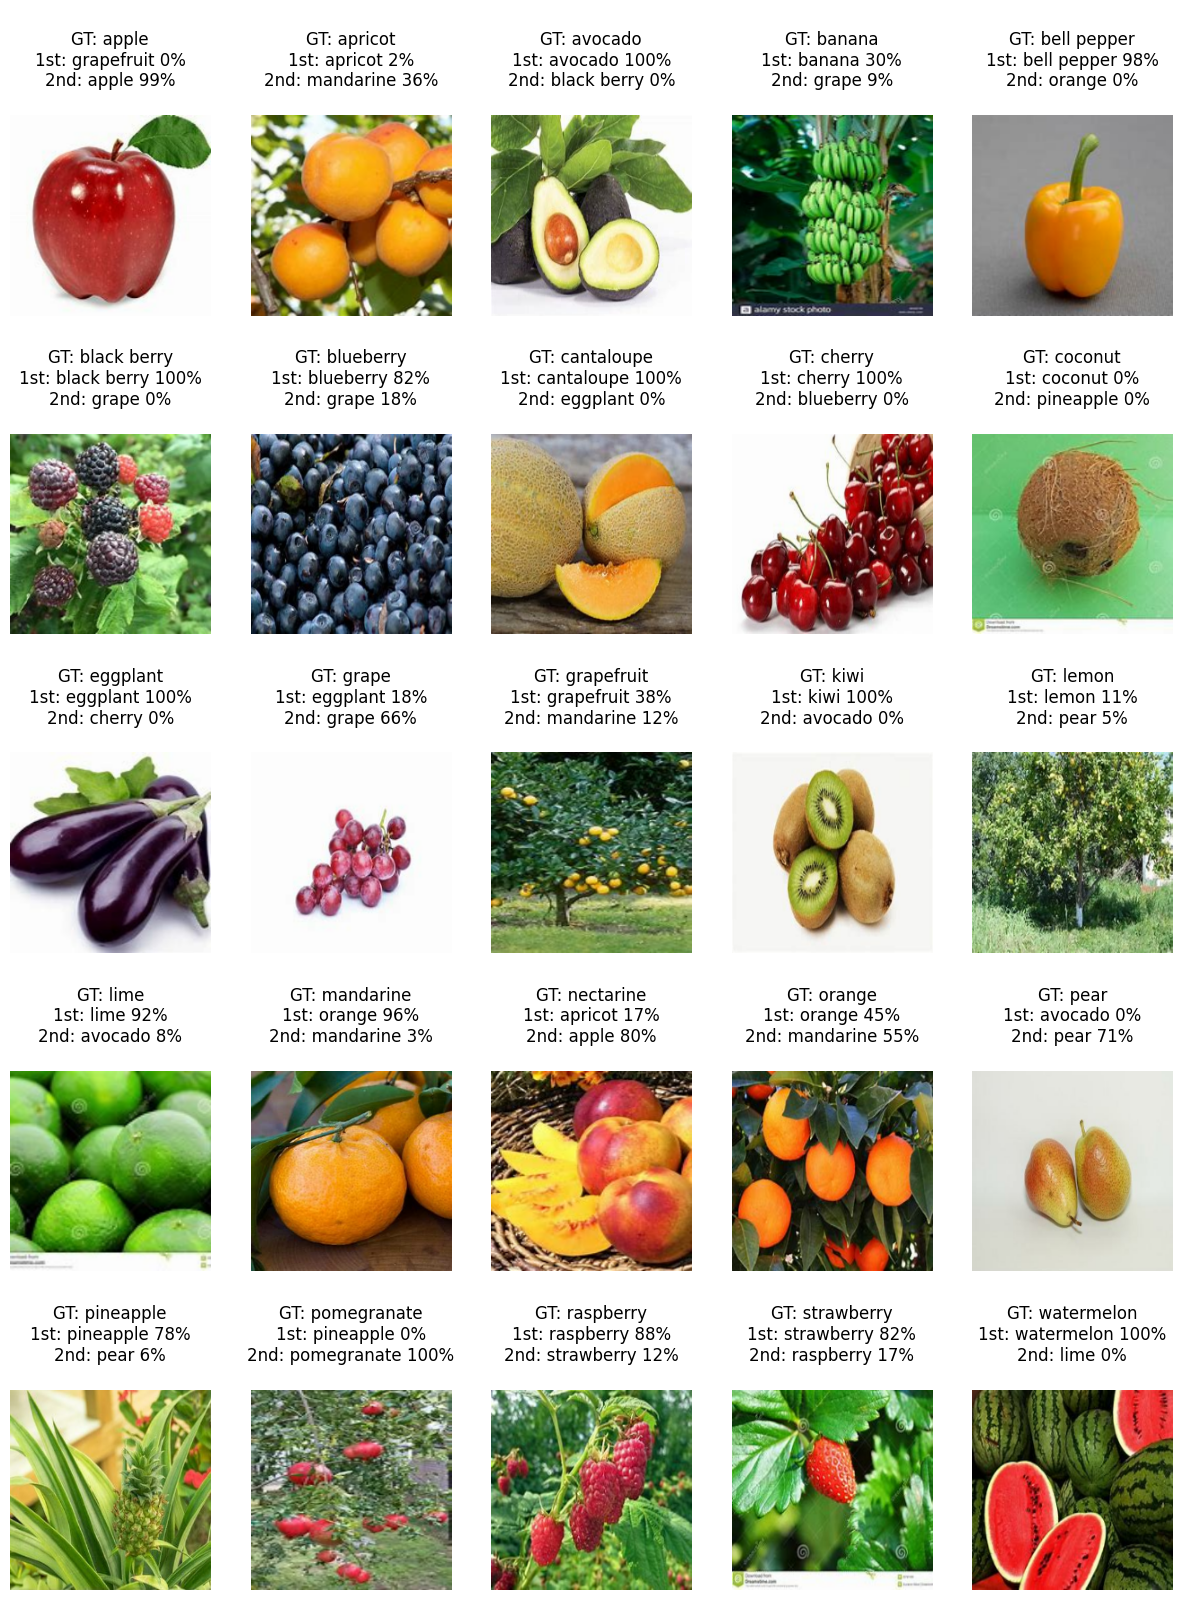

In [4]:
run('20230626-130930-0')